<b>Food Prediction using Tensorflow</b>
--

AUTHOR : HAMORA HADI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
import tensorflow as tf

In [12]:
data=pd.read_csv("C:/Users/User/Desktop/FoodPredict/indian_food.csv")

In [13]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [14]:
data.shape

(255, 9)

In [15]:
data.info

<bound method DataFrame.info of                name                                        ingredients  \
0        Balu shahi                    Maida flour, yogurt, oil, sugar   
1            Boondi                            Gram flour, ghee, sugar   
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
..              ...                                                ...   
250       Til Pitha            Glutinous rice, black sesame seeds, gur   
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetaria

In [16]:
data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [17]:
food_vocab = set()

for ingredients in data['ingredients']:
    for food in ingredients.split(','):
        if food.strip().lower() not in food_vocab:
            food_vocab.add(food.strip().lower())

In [18]:
food_vocab

{'all purpose flour',
 'almond',
 'almonds',
 'aloo',
 'alum powder',
 'amaranth leaves',
 'amchur powder',
 'apricots',
 'arbi ke patte',
 'arhar dal',
 'arrowroot powder',
 'atta',
 'avocado oil',
 'axone',
 'baby corn',
 'baby potatoes',
 'badam',
 'baingan',
 'baking powder',
 'baking soda',
 'banana',
 'banana flower',
 'basmati rice',
 'bay leaf',
 'beans',
 'beaten rice flakes',
 'beef',
 'beetroot',
 'bell pepper',
 'bell peppers',
 'bengal gram flour',
 'besan',
 'besan flour',
 'bhatura',
 'bhuna chana',
 'biryani masala',
 'biryani masala powder',
 'bitter gourd',
 'black lentils',
 'black pepper',
 'black salt',
 'black sesame seeds',
 'blend rice',
 'boiled pork',
 'boiled potatoes',
 'bombay duck',
 'bombay rava',
 'boondi',
 'bottle gourd',
 'bread crumbs',
 'brinjal',
 'brown rice',
 'brown rice flour',
 'butter',
 'cabbage',
 'canned coconut milk',
 'capsicum',
 'cardamom',
 'cardamom pods',
 'cardamom powder',
 'carrot',
 'carrots',
 'cashew nuts',
 'cashews',
 'cashe

In [19]:
len(food_vocab)

365

In [20]:
food_columns = pd.DataFrame()

for i, ingredients in enumerate(data['ingredients']):
    for food in ingredients.split(','):
        if food.strip().lower() in food_vocab:
            food_columns.loc[i, food.strip().lower()] = 1

food_columns = food_columns.fillna(0)

In [21]:
food_columns

,maida flour,yogurt,oil,sugar,gram flour,ghee,carrots,milk,cashews,raisins,...,soaked rice,cardamom pods,red pepper,watercress,glutinous rice,egg yolks,dry dates,dried rose petals,arrowroot powder,ginger powder
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
food_columns.describe

<bound method NDFrame.describe of      maida flour  yogurt  oil  sugar  gram flour  ghee  carrots  milk  \
0            1.0     1.0  1.0    1.0         0.0   0.0      0.0   0.0   
1            0.0     0.0  0.0    1.0         1.0   1.0      0.0   0.0   
2            0.0     0.0  0.0    1.0         0.0   1.0      1.0   1.0   
3            0.0     0.0  0.0    1.0         0.0   1.0      0.0   1.0   
4            0.0     0.0  0.0    1.0         0.0   1.0      0.0   1.0   
..           ...     ...  ...    ...         ...   ...      ...   ...   
250          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
251          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
252          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
253          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   
254          0.0     0.0  0.0    0.0         0.0   0.0      0.0   0.0   

     cashews  raisins  ...  soaked rice  cardamom pods  red pepper  \
0        0.0      0

In [24]:
data = data.drop(['name', 'ingredients'], axis=1)

In [25]:
data.head(10)

,diet,prep_time,cook_time,flavor_profile,course,state,region
0,vegetarian,45,25,sweet,dessert,West Bengal,East
1,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,vegetarian,15,60,sweet,dessert,Punjab,North
3,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,vegetarian,15,40,sweet,dessert,West Bengal,East
5,vegetarian,10,50,sweet,dessert,West Bengal,East
6,vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,vegetarian,10,20,sweet,dessert,-1,-1
8,vegetarian,20,30,sweet,dessert,West Bengal,East
9,vegetarian,10,40,sweet,dessert,-1,-1


In [26]:
data.info

<bound method DataFrame.info of            diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian         45         25          sweet  dessert   
1    vegetarian         80         30          sweet  dessert   
2    vegetarian         15         60          sweet  dessert   
3    vegetarian         15         30          sweet  dessert   
4    vegetarian         15         40          sweet  dessert   
..          ...        ...        ...            ...      ...   
250  vegetarian          5         30          sweet  dessert   
251  vegetarian         20         60          sweet  dessert   
252  vegetarian         -1         -1          sweet  dessert   
253  vegetarian         20         45          sweet  dessert   
254  vegetarian         -1         -1          sweet  dessert   

               state      region  
0        West Bengal        East  
1          Rajasthan        West  
2             Punjab       North  
3          Rajasthan        West  
4        Wes

In [27]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'diet': ['vegetarian', 'non vegetarian'],
 'flavor_profile': ['sweet', 'spicy', 'bitter', '-1', 'sour'],
 'course': ['dessert', 'main course', 'starter', 'snack'],
 'state': ['West Bengal',
  'Rajasthan',
  'Punjab',
  'Uttar Pradesh',
  '-1',
  'Odisha',
  'Maharashtra',
  'Uttarakhand',
  'Assam',
  'Bihar',
  'Andhra Pradesh',
  'Karnataka',
  'Telangana',
  'Kerala',
  'Tamil Nadu',
  'Gujarat',
  'Tripura',
  'Manipur',
  'Nagaland',
  'NCT of Delhi',
  'Jammu & Kashmir',
  'Chhattisgarh',
  'Haryana',
  'Madhya Pradesh',
  'Goa'],
 'region': ['East',
  'West',
  'North',
  '-1',
  'North East',
  'South',
  'Central',
  nan]}

In [28]:
data[['flavor_profile', 'state', 'region']] = data[['flavor_profile', 'state', 'region']].replace('-1', np.NaN)

In [29]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [30]:
data = onehot_encode(
    data,
    ['flavor_profile', 'course', 'state', 'region'],
    ['f', 'c', 's', 'r']
)

In [32]:
data.head(5)


,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,vegetarian,45,25,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,vegetarian,80,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,vegetarian,15,60,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,vegetarian,15,30,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,vegetarian,15,40,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [33]:
data.info

<bound method DataFrame.info of            diet  prep_time  cook_time  f_bitter  f_sour  f_spicy  f_sweet  \
0    vegetarian         45         25         0       0        0        1   
1    vegetarian         80         30         0       0        0        1   
2    vegetarian         15         60         0       0        0        1   
3    vegetarian         15         30         0       0        0        1   
4    vegetarian         15         40         0       0        0        1   
..          ...        ...        ...       ...     ...      ...      ...   
250  vegetarian          5         30         0       0        0        1   
251  vegetarian         20         60         0       0        0        1   
252  vegetarian         -1         -1         0       0        0        1   
253  vegetarian         20         45         0       0        0        1   
254  vegetarian         -1         -1         0       0        0        1   

     c_dessert  c_main course  c_snack  ...

In [34]:
data[['prep_time', 'cook_time']] = data[['prep_time', 'cook_time']].replace(-1, np.NaN)

In [35]:
data['prep_time'] = data['prep_time'].fillna(data['prep_time'].mean())
data['cook_time'] = data['cook_time'].fillna(data['cook_time'].mean())

In [36]:
label_encoder = LabelEncoder()

data['diet'] = label_encoder.fit_transform(data['diet'])

In [37]:
{index: label for index, label in enumerate(label_encoder.classes_)}

{0: 'non vegetarian', 1: 'vegetarian'}

In [38]:
data.head()

,diet,prep_time,cook_time,f_bitter,f_sour,f_spicy,f_sweet,c_dessert,c_main course,c_snack,...,s_Tripura,s_Uttar Pradesh,s_Uttarakhand,s_West Bengal,r_Central,r_East,r_North,r_North East,r_South,r_West
0,1,45.0,25.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,80.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,15.0,60.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,15.0,30.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,15.0,40.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diet               255 non-null    int32  
 1   prep_time          255 non-null    float64
 2   cook_time          255 non-null    float64
 3   f_bitter           255 non-null    uint8  
 4   f_sour             255 non-null    uint8  
 5   f_spicy            255 non-null    uint8  
 6   f_sweet            255 non-null    uint8  
 7   c_dessert          255 non-null    uint8  
 8   c_main course      255 non-null    uint8  
 9   c_snack            255 non-null    uint8  
 10  c_starter          255 non-null    uint8  
 11  s_Andhra Pradesh   255 non-null    uint8  
 12  s_Assam            255 non-null    uint8  
 13  s_Bihar            255 non-null    uint8  
 14  s_Chhattisgarh     255 non-null    uint8  
 15  s_Goa              255 non-null    uint8  
 16  s_Gujarat          255 non

In [40]:
data.info

<bound method DataFrame.info of      diet  prep_time  cook_time  f_bitter  f_sour  f_spicy  f_sweet  \
0       1  45.000000  25.000000         0       0        0        1   
1       1  80.000000  30.000000         0       0        0        1   
2       1  15.000000  60.000000         0       0        0        1   
3       1  15.000000  30.000000         0       0        0        1   
4       1  15.000000  40.000000         0       0        0        1   
..    ...        ...        ...       ...     ...      ...      ...   
250     1   5.000000  30.000000         0       0        0        1   
251     1  20.000000  60.000000         0       0        0        1   
252     1  35.386667  38.911894         0       0        0        1   
253     1  20.000000  45.000000         0       0        0        1   
254     1  35.386667  38.911894         0       0        0        1   

     c_dessert  c_main course  c_snack  ...  s_Tripura  s_Uttar Pradesh  \
0            1              0        0  

<b>SPLITTING AND SCALING</b>

In [41]:
y = data['diet']

X = data.drop('diet', axis=1)
X_food = pd.concat([X, food_columns], axis=1)

In [42]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_food = scaler.fit_transform(X_food)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_food_train, X_food_test, y_food_train, y_food_test = train_test_split(X_food, y, train_size=0.7, random_state=42)

<b>TRAINING</b>

In [52]:
def build_model(num_features, hidden_layer_sizes=(64, 64)):
    inputs = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc')
        ]
    )
    
    return model

In [57]:
X.shape

(255, 40)

In [62]:
model = build_model(40)

batch_size = 64
epochs = 40

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

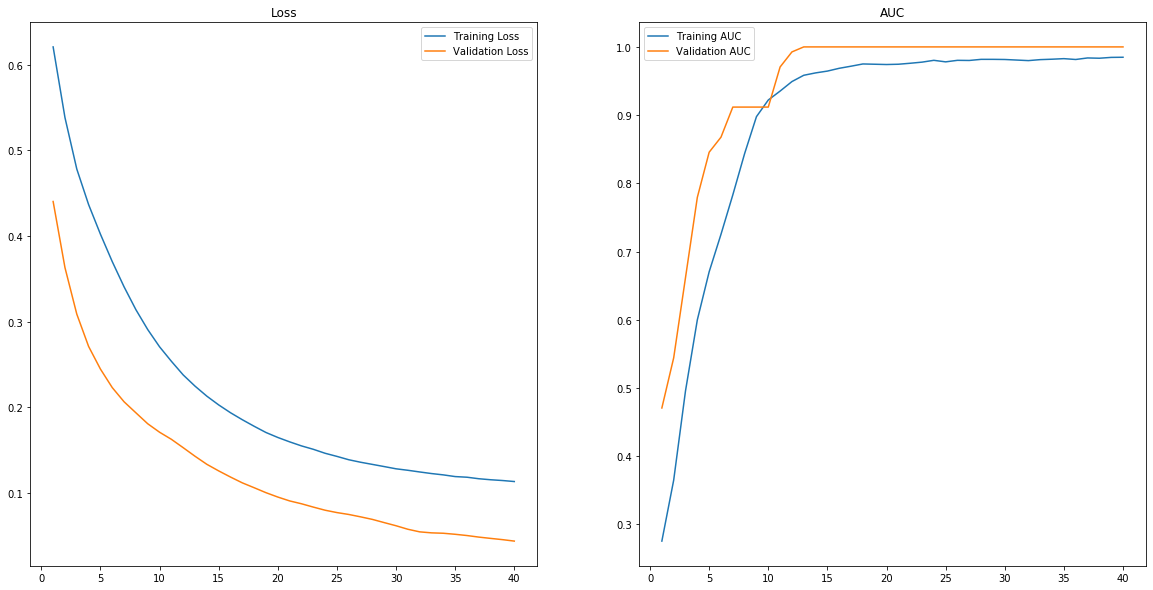

In [63]:
plt.figure(figsize=(20, 10))

epochs_range = range(1, epochs + 1)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

In [64]:
print(np.argmin(val_loss), np.argmax(val_auc))

39 12


In [65]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.3939 - accuracy: 0.8831 - auc: 0.6194


[0.3938998878002167, 0.8831169009208679, 0.6193877458572388]

In [66]:
len(y_test)

77

Re-training with ingredient features<br>

In [67]:
X_food.shape

(255, 405)

In [71]:
food_model = build_model(405, hidden_layer_sizes=(128, 128))

food_batch_size = 64
food_epochs = 400

food_history = food_model.fit(
    X_food_train,
    y_food_train,
    validation_split=0.2,
    batch_size=food_batch_size,
    epochs=food_epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

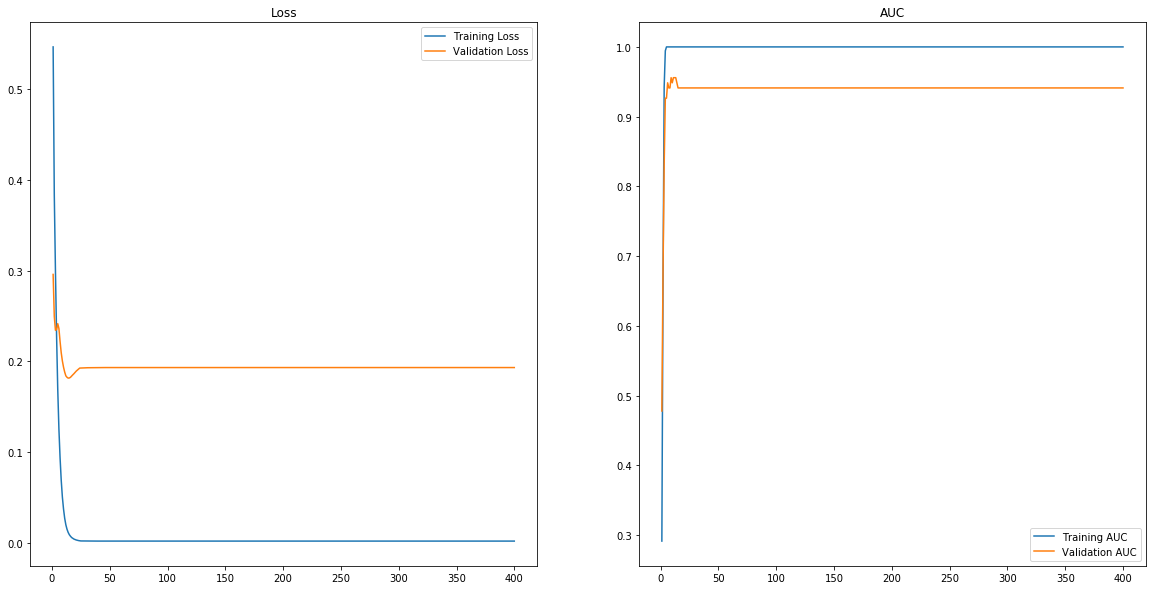

In [72]:
plt.figure(figsize=(20, 10))

food_epochs_range = range(1, food_epochs + 1)
food_train_loss, food_val_loss = food_history.history['loss'], food_history.history['val_loss']
food_train_auc, food_val_auc = food_history.history['auc'], food_history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(food_epochs_range, food_train_loss, label="Training Loss")
plt.plot(food_epochs_range, food_val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(food_epochs_range, food_train_auc, label="Training AUC")
plt.plot(food_epochs_range, food_val_auc, label="Validation AUC")
plt.title("AUC")
plt.legend()

plt.show()

In [73]:
print(np.argmin(food_val_loss), np.argmax(food_val_auc))

13 8


In [74]:
food_model.evaluate(X_food_test, y_food_test)

3/3 [==============================] - 0s 665us/step - loss: 0.3214 - accuracy: 0.8571 - auc: 0.8184


[0.3214205503463745, 0.8571428656578064, 0.8183673620223999]

Just this<br>
<b>THANK YOU!</b>